# 난이도 업!!!

딥러닝에서 매우 흔하게 사용되는 분류(Classification) 문제를 다뤄보겠습니다.

우리가 학습시킬 모델은 패션 MNIST(Fashion MNIST) 데이터셋을 사용하여 의류 이미지를 10가지 카테고리(티셔츠/상의, 바지, 풀오버, 드레스, 코트, 샌들, 셔츠, 스니커즈, 가방, 발목 부츠)로 분류하는 모델입니다. 이 과정에서 다중 클래스 분류, 다층 신경망(Multi-layer Perceptron), 그리고 이미지 데이터 처리의 기본을 경험하게 될 겁니다.

학습 목표
다층 신경망 모델을 구축합니다.
패션 MNIST 데이터셋을 불러오고 전처리합니다.
다중 클래스 분류 문제에 맞는 손실 함수와 평가 지표를 사용합니다.
모델 학습 과정에서 검증(Validation) 데이터셋의 중요성을 이해합니다.

In [2]:
# 1. 필요한 라이브러리 임포트
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) # TensorFlow 버전 확인

2.14.1


In [4]:
# 2. 데이터셋 준비: Fashion MNIST
# Fashion MNIST는 28x28 픽셀의 흑백 의류 이미지 70,000개(훈련 60,000개, 테스트 10,000개)로 구성된 데이터셋입니다.

# Fashion MNIST 데이터셋 로드 (TensorFlow 내장)
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 클래스 이름 정의 (레이블 숫자를 실제 이름으로 매핑)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 탐색: 이미지 형태 및 개수 확인
print(f"훈련 이미지 형태: {train_images.shape}") # 60000개 이미지, 각 28x28 픽셀
print(f"훈련 레이블 개수: {len(train_labels)}") # 60000개
print(f"테스트 이미지 형태: {test_images.shape}")
print(f"테스트 레이블 개수: {len(test_labels)}")

훈련 이미지 형태: (60000, 28, 28)
훈련 레이블 개수: 60000
테스트 이미지 형태: (10000, 28, 28)
테스트 레이블 개수: 10000


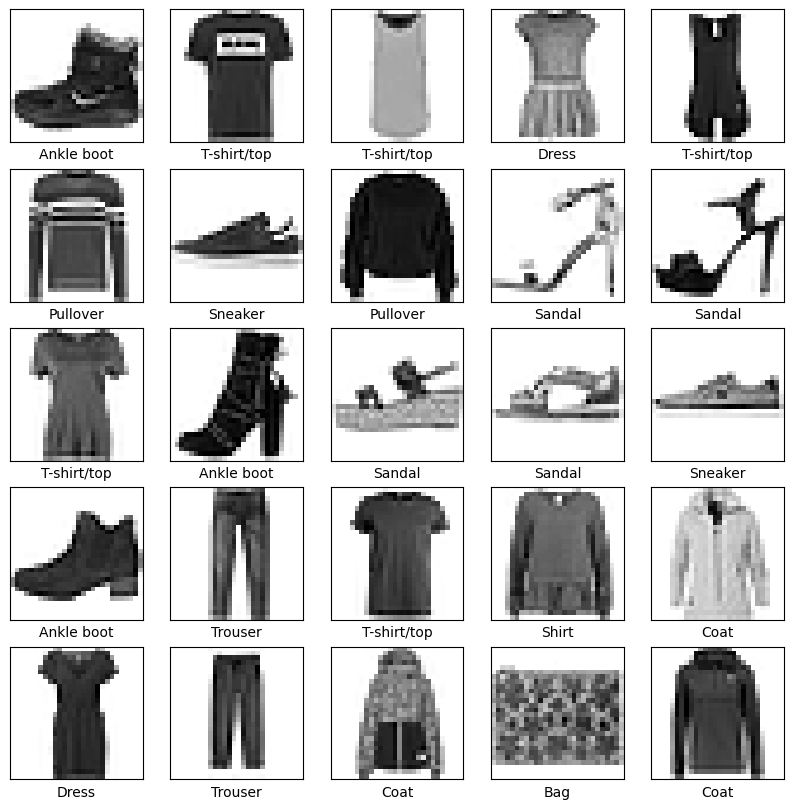

In [6]:
# 3. 데이터 전처리: 스케일링
# 신경망에 데이터를 주입하기 전에 전처리가 필요합니다. 픽셀 값은 0에서 255 사이이므로, 이를 0에서 1 사이의 값으로 **정규화(Normalization)**하여 모델 학습이 더 효율적으로 이루어지도록 합니다.

# 픽셀 값을 0-1 사이로 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

# 전처리된 이미지 확인 (선택 사항)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
# 4. 모델 정의: 다층 신경망 (Multi-layer Perceptron)
# 이제 모델을 정의합니다. 이전 선형 회귀 모델보다 층(Layer)이 더 많아지고 복잡해집니다.

# Flatten: 28x28 픽셀의 2차원 이미지 데이터를 784개의 1차원 배열로 펼칩니다. Dense 층은 1차원 입력을 받기 때문에 이 과정이 필요합니다.
# Dense (은닉층): 128개의 뉴런을 가진 완전 연결 층입니다. relu 활성화 함수를 사용하여 비선형성을 추가합니다.
# Dense (출력층): 10개의 뉴런을 가진 완전 연결 층입니다. softmax 활성화 함수를 사용하여 각 클래스에 속할 확률을 출력합니다. 10개의 뉴런은 우리가 분류할 10가지 의류 카테고리를 의미합니다.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 입력 이미지를 1차원으로 변환
    keras.layers.Dense(128, activation='relu'), # 은닉층: 128개 뉴런, ReLU 활성화 함수
    keras.layers.Dense(10, activation='softmax') # 출력층: 10개 뉴런, Softmax 활성화 함수
])

In [10]:
# 5. 모델 컴파일: 학습 전략 설정
# 분류 문제에 맞는 옵티마이저, 손실 함수, 평가 지표를 설정합니다.

# 옵티마이저: adam (이전과 동일하게 효율적인 옵티마이저)
# 손실 함수: sparse_categorical_crossentropy
# 이 손실 함수는 정수 레이블(0, 1, 2, ... 9)을 가진 다중 클래스 분류 문제에 적합합니다. 만약 레이블이 원-핫 인코딩(예: [0,0,1,0,0,...])되어 있다면 categorical_crossentropy를 사용합니다.
# 평가 지표: accuracy (정확도)
# 모델이 얼마나 정확하게 분류하는지를 측정하는 가장 일반적인 지표입니다.

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


모델 학습 시작...
Epoch 1/10
1500/1500 [==============================] - 1s 663us/step - loss: 0.5176 - accuracy: 0.8176 - val_loss: 0.4126 - val_accuracy: 0.8514
Epoch 2/10
1500/1500 [==============================] - 1s 557us/step - loss: 0.3873 - accuracy: 0.8611 - val_loss: 0.3691 - val_accuracy: 0.8701
Epoch 3/10
1500/1500 [==============================] - 1s 557us/step - loss: 0.3469 - accuracy: 0.8745 - val_loss: 0.3435 - val_accuracy: 0.8764
Epoch 4/10
1500/1500 [==============================] - 1s 549us/step - loss: 0.3203 - accuracy: 0.8817 - val_loss: 0.3428 - val_accuracy: 0.8765
Epoch 5/10
1500/1500 [==============================] - 1s 554us/step - loss: 0.3002 - accuracy: 0.8889 - val_loss: 0.3462 - val_accuracy: 0.8801
Epoch 6/10
1500/1500 [==============================] - 1s 554us/step - loss: 0.2834 - accuracy: 0.8954 - val_loss: 0.3354 - val_accuracy: 0.8797
Epoch 7/10
1500/1500 [==============================] - 1s 559us/step - loss: 0.2730 - accuracy: 0.8983 - val_l

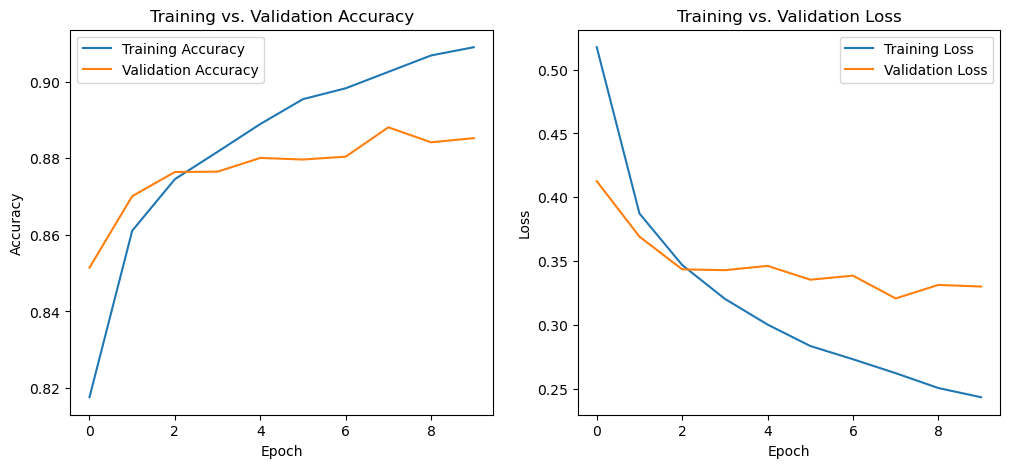

In [12]:
# 6. 모델 학습: 훈련 데이터로 모델 훈련
# 이제 fit() 메서드를 호출하여 모델을 훈련합니다. 이번에는 validation_split 매개변수를 사용하여 훈련 데이터의 일부를 검증 세트로 분리합니다.
# 에포크(Epochs): 전체 훈련 데이터셋을 몇 번 반복하여 학습할 것인지 지정합니다.
# 검증 세트(Validation Set): 모델이 훈련 데이터를 학습하는 동안, 검증 세트의 성능을 모니터링하여 과적합(Overfitting) 여부를 확인할 수 있습니다. 모델이 훈련 데이터에서는 잘 작동하지만, 한 번도 보지 못한 검증 데이터에서는 성능이 떨어지는 것이 과적합의 징후입니다.

print("\n모델 학습 시작...")
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2) # 20%를 검증 세트로 사용
print("모델 학습 완료!")

# 학습 및 검증 정확도/손실 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()

In [14]:
# 7. 모델 평가: 테스트 데이터로 모델 성능 측정
# 모델이 훈련되지 않은 테스트 데이터셋에 대해 얼마나 잘 작동하는지 평가합니다. 이것이 모델의 일반화(Generalization) 성능을 나타내는 중요한 지표입니다.

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\n테스트 정확도: {test_acc:.4f}")
print(f"테스트 손실: {test_loss:.4f}")

313/313 - 0s - loss: 0.3600 - accuracy: 0.8755 - 141ms/epoch - 449us/step

테스트 정확도: 0.8755
테스트 손실: 0.3600


313/313 [==============================] - 0s 312us/step

첫 번째 테스트 이미지의 예측: [8.3227309e-07 2.2527815e-09 3.0628948e-07 2.8330953e-09 1.9977411e-07
 3.3746916e-03 1.0706526e-05 5.1854126e-02 1.3820276e-07 9.4475901e-01]
첫 번째 테스트 이미지의 예측 클래스 (가장 높은 확률): 9
첫 번째 테스트 이미지의 실제 레이블: 9
예측 클래스 이름: Ankle boot
실제 클래스 이름: Ankle boot


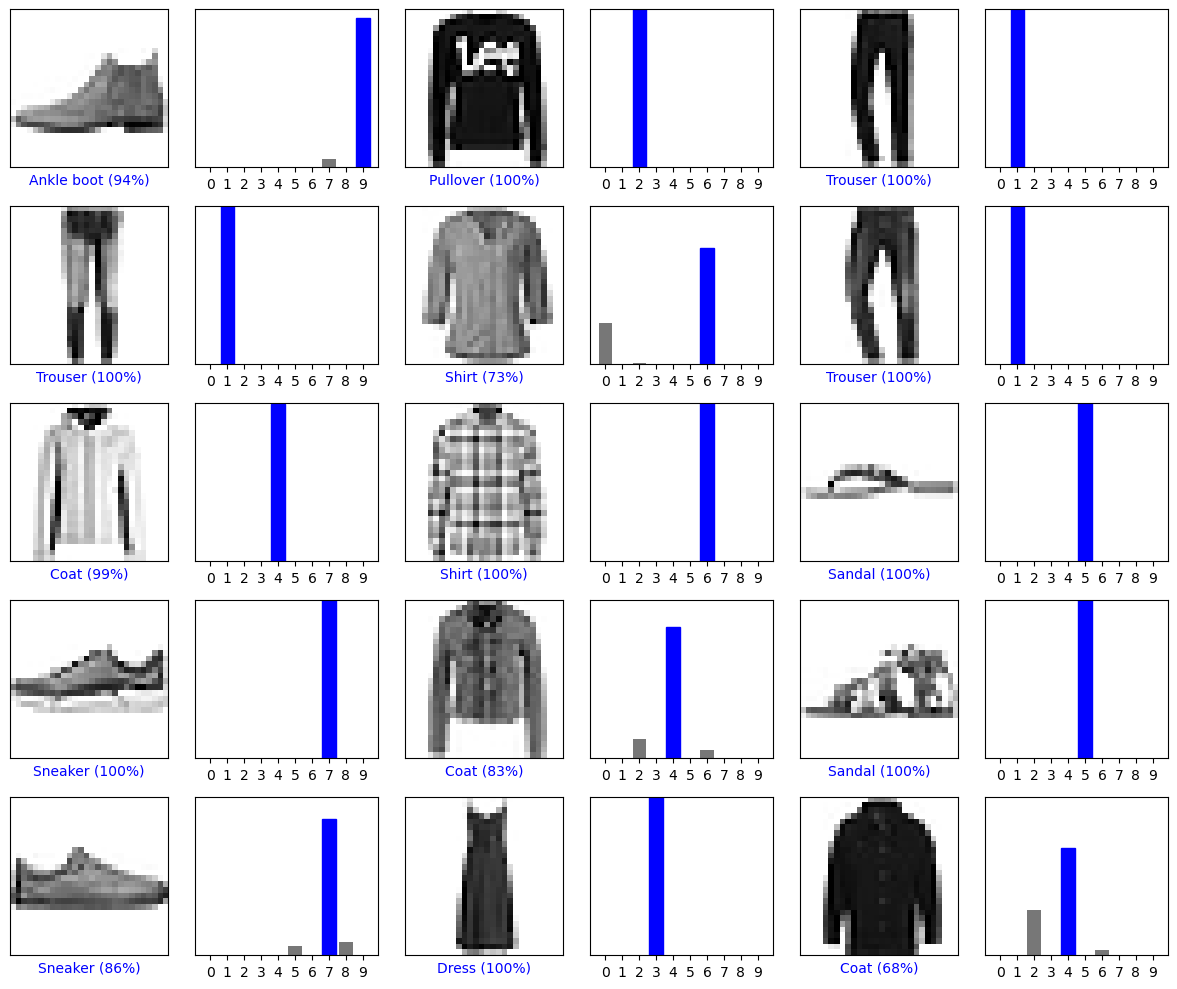

In [16]:
# 8. 예측 수행: 새로운 이미지 분류
# 학습된 모델을 사용하여 새로운 이미지에 대한 예측을 수행합니다.

predictions = model.predict(test_images)

# 첫 번째 테스트 이미지의 예측 결과 확인
print(f"\n첫 번째 테스트 이미지의 예측: {predictions[0]}") # 각 클래스별 확률
print(f"첫 번째 테스트 이미지의 예측 클래스 (가장 높은 확률): {np.argmax(predictions[0])}")
print(f"첫 번째 테스트 이미지의 실제 레이블: {test_labels[0]}")
print(f"예측 클래스 이름: {class_names[np.argmax(predictions[0])]}")
print(f"실제 클래스 이름: {class_names[test_labels[0]]}")


# 예측 시각화 함수
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue' # 맞으면 파란색
    else:
        color = 'red' # 틀리면 빨간색

    plt.xlabel(f"{class_names[predicted_label]} ({100*np.max(predictions_array):.0f}%)",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# 몇 가지 예측 결과 시각화
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

이전 코드와의 주요 차이점 및 새로운 개념
데이터셋:

Fashion MNIST: 실제 이미지 데이터를 사용하며, 훈련/테스트 세트가 미리 나뉘어져 있습니다.
다중 클래스: 이전에는 하나의 숫자(y)를 예측했지만, 이제는 10가지 클래스 중 하나를 예측합니다.
데이터 전처리:

정규화: 픽셀 값을 0-255에서 0-1로 스케일링하는 과정이 추가되었습니다. 이는 신경망 학습의 안정성과 효율성을 높입니다.
모델 구조 (다층 신경망):

Flatten 층: 2차원 이미지를 1차원 벡터로 변환합니다. Dense 층이 1차원 입력을 받기 위함입니다.
은닉층 (Dense(128, activation='relu')):
Dense 층이 하나 더 추가되어 **"깊이"**를 가집니다. 이렇게 여러 층을 쌓은 모델을 "딥러닝(Deep Learning)" 모델이라고 부릅니다.
활성화 함수(relu): 이전에 설명했던 Dense 층은 선형 변환(y=Wx+b)만 수행합니다. relu (Rectified Linear Unit)와 같은 비선형 활성화 함수를 각 층 사이에 추가함으로써, 모델이 복잡하고 비선형적인 패턴을 학습할 수 있게 됩니다.
출력층 (Dense(10, activation='softmax')):
units=10: 10가지 클래스 각각에 대한 출력 뉴런을 가집니다.
softmax 활성화 함수: 출력 뉴런들의 값을 모두 0과 1 사이의 확률 값으로 변환하고, 이 확률 값들의 합이 항상 1이 되도록 합니다. 가장 높은 확률을 가진 클래스가 모델의 최종 예측이 됩니다.
컴파일 (손실 함수):

sparse_categorical_crossentropy: 다중 클래스 분류 문제에 사용되는 손실 함수입니다. 각 클래스 레이블이 정수(0, 1, ..., 9)로 주어질 때 적합합니다. 모델이 예측한 확률 분포와 실제 정답 클래스 사이의 차이를 측정합니다.
모델 학습 (검증 세트):

validation_split=0.2: 훈련 데이터의 20%를 자동으로 분리하여 검증 세트로 사용합니다. 이 검증 세트는 모델이 학습하는 동안 한 번도 보지 못한 데이터에 대해 모델의 성능이 어떻게 변하는지 모니터링하는 데 사용됩니다.
과적합 방지: 훈련 손실은 계속 감소하지만 검증 손실은 증가하는 지점을 통해 과적합 여부를 판단하고, 학습을 조기에 중단하거나 다른 기법(예: 드롭아웃)을 적용하는 데 활용됩니다.
이 코드는 실제 딥러닝 모델 학습의 기본적인 파이프라인을 보여줍니다. 데이터 전처리, 다층 신경망 정의, 분류 문제에 맞는 손실 함수와 평가 지표 설정, 그리고 검증 세트를 통한 성능 모니터링까지 포함하고 있습니다.